## Play One of the Songs

In [ ]:
just comment out while reloading code because it plays everytime

import mido
from mido import MidiFile

midi_file = MidiFile('POP909/909/909.mid')

# Open output port with default backend
with mido.open_output() as port:
    for message in midi_file.play():
        port.send(message)

## Analyzing & Processing the MIDI Data

Use one midi file as a tester to see what information is in the files

In [29]:
import pretty_midi

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('POP909/909/909.mid')

# Check if tempo information is available
if midi_data.get_tempo_changes():
    print("Tempo information exists.")
else:
    print("Tempo information does not exist.")

# Check if time signature changes are available
if midi_data.time_signature_changes:
    print("Time signature changes exist.")
else:
    print("Time signature changes do not exist.")

# Check if there are any pitched instruments (containing pitch, duration, velocity)
pitched_instruments = [i for i in midi_data.instruments if i.is_drum is False and len(i.notes) > 0]
if pitched_instruments:
    print("Pitched instruments exist.")
    
    # Check if there's pitch, duration, and velocity in the first pitched instrument
    first_pitched_instrument = pitched_instruments[0]
    if any(note.pitch is not None and note.start is not None and note.end is not None and note.velocity is not None
           for note in first_pitched_instrument.notes):
        print("Pitch, duration, and velocity information exist in the first pitched instrument.")
    else:
        print("Pitch, duration, or velocity information is missing in the first pitched instrument.")
else:
    print("No pitched instruments found.")


Tempo information exists.
Time signature changes exist.
Pitched instruments exist.
Pitch, duration, and velocity information exist in the first pitched instrument.


In [30]:
import pretty_midi

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('POP909/909/909.mid')

# Print time signature changes
print("Time Signatures:")
for ts in midi_data.time_signature_changes:
    print(ts)

# Print tempo changes
print("\nTempo Changes:")
for tempo_change in midi_data.get_tempo_changes()[1]:
    print(tempo_change)

# Print instrument information
print("\nInstruments:")
for instrument in midi_data.instruments:
    print(f'Name: {instrument.name}, Program: {instrument.program}, Is drum: {instrument.is_drum}')

    # Print pitch, duration, and velocity for each note in the instrument
    if not instrument.is_drum and len(instrument.notes) > 0:
        print(f"\nNotes for {instrument.name}:")
        for note in instrument.notes:
            print(f'Pitch: {note.pitch}, Duration: {note.end - note.start:.4f}, Velocity: {note.velocity}')


Time Signatures:
1/4 at 0.00 seconds

Tempo Changes:
104.00001386666852
103.75022479215373
104.00001386666852
103.75022479215373
104.00001386666852
103.75022479215373
104.00001386666852

Instruments:
Name: MELODY, Program: 0, Is drum: False

Notes for MELODY:
Pitch: 76, Duration: 0.0829, Velocity: 85
Pitch: 77, Duration: 0.0913, Velocity: 78
Pitch: 79, Duration: 0.0913, Velocity: 74
Pitch: 77, Duration: 0.0889, Velocity: 78
Pitch: 76, Duration: 0.0962, Velocity: 81
Pitch: 77, Duration: 0.0865, Velocity: 80
Pitch: 79, Duration: 0.0913, Velocity: 78
Pitch: 77, Duration: 0.0962, Velocity: 80
Pitch: 76, Duration: 0.1118, Velocity: 81
Pitch: 77, Duration: 0.1118, Velocity: 80
Pitch: 79, Duration: 0.1214, Velocity: 76
Pitch: 79, Duration: 0.0745, Velocity: 76
Pitch: 79, Duration: 0.0649, Velocity: 71
Pitch: 79, Duration: 0.1418, Velocity: 74
Pitch: 88, Duration: 0.1851, Velocity: 80
Pitch: 84, Duration: 0.5769, Velocity: 75
Pitch: 74, Duration: 0.0793, Velocity: 81
Pitch: 76, Duration: 0.173

In [ ]:
# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for MELODY:")
    for note in midi_data.instruments[0].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration
        
# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for BRIDGE:")
    for note in midi_data.instruments[1].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration
        
# Print some notes for the first instrument, if it has any
if midi_data.instruments:
    print("\nNotes for PIANO:")
    for note in midi_data.instruments[2].notes[:5]:  # Just the first 10 notes
        print(note)
        print(f"Duration: {note.end - note.start}")  # Adding duration

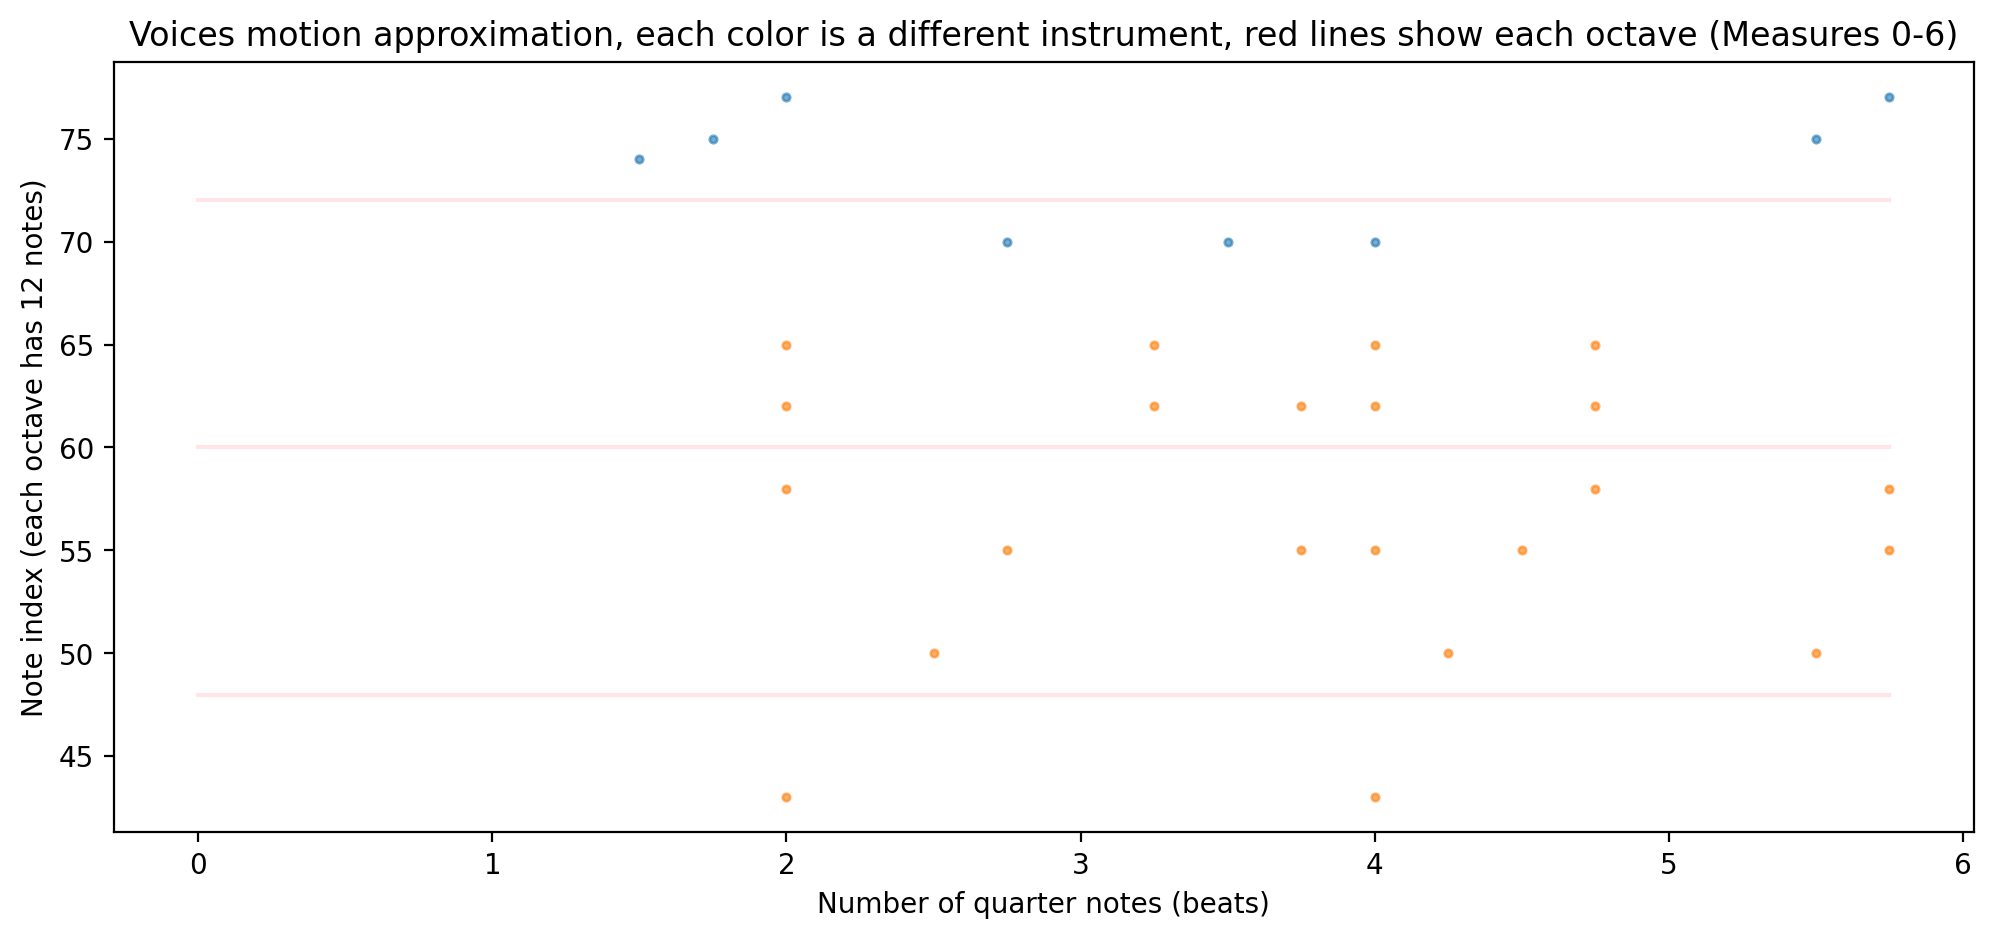

In [9]:
from music21 import converter, note, chord, pitch
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part:  # Remove .flat here
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
    
    return ret, parent_element


def print_parts_countour(midi_stream, start_measure, end_measure):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes.
    for i in range(len(midi_stream.parts)):
        top = [n for n in midi_stream.parts[i].flat.notes if start_measure <= n.offset < end_measure]                 
        y, parent_element = extract_notes(top)
        if len(y) < 1:
            continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)
        
        aux = min(y)
        if aux < minPitch:
            minPitch = aux
            
        aux = max(y)
        if aux > maxPitch:
            maxPitch = aux
            
        aux = max(x)
        if aux > xMax:
            xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if minPitch < linePitch < maxPitch:
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))            

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title(f'Voices motion approximation, each color is a different instrument, red lines show each octave (Measures {start_measure}-{end_measure})')
    plt.show()

# Assuming you have a music21 stream object named midi_data
midi_data = converter.parse('C:/Users/naomi/Thesis/Thesis/Thesis-main/POP909/003/003.mid')
print_parts_countour(midi_data, start_measure=0, end_measure=6)


<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x1e582d7fbe0>>

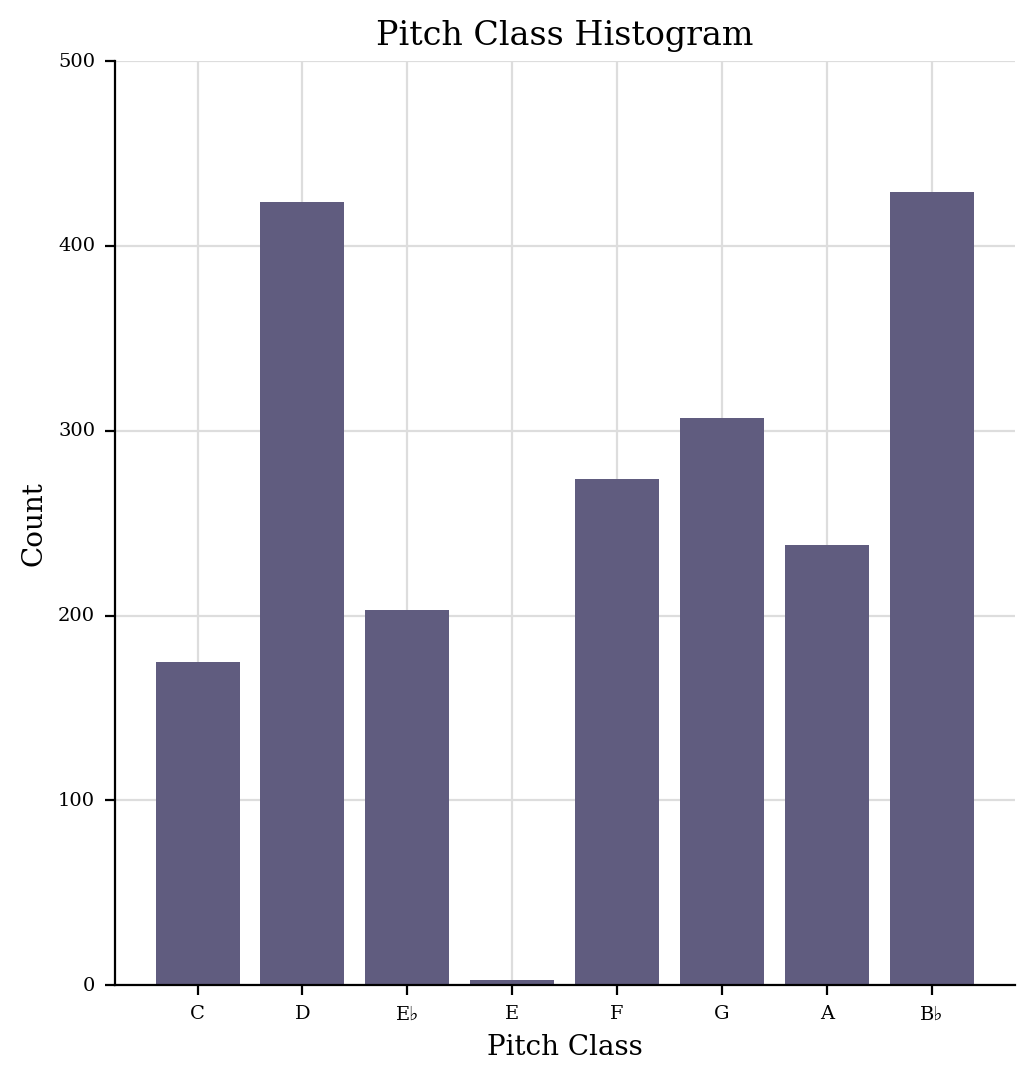

In [10]:
midi_data.plot('histogram', 'pitchClass', 'count')

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score 0x1e582d7fbe0>>

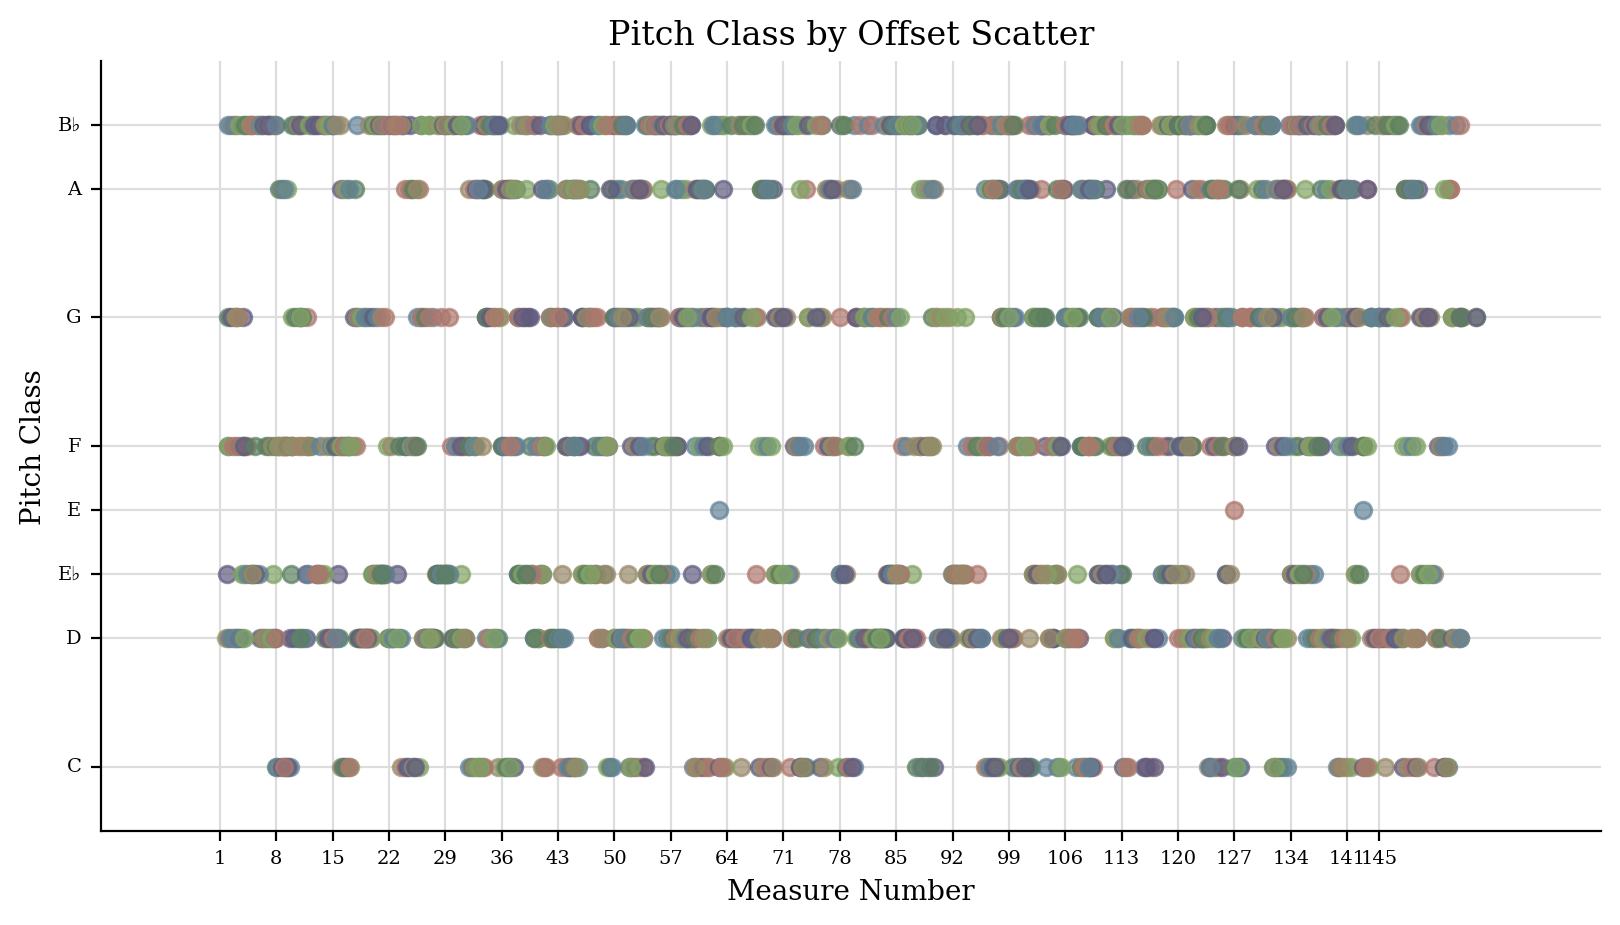

In [11]:
midi_data.plot('scatter', 'offset', 'pitchClass')

In [12]:
timeSignature = midi_data.getTimeSignatures()[0]
music_analysis = midi_data.analyze('key')
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))
print("Expected music key: {0}".format(music_analysis))
print("Music key confidence: {0}".format(music_analysis.correlationCoefficient))
print("Other music key alternatives:")
for analysis in music_analysis.alternateInterpretations:
    if (analysis.correlationCoefficient > 0.5):
        print(analysis)

Music time signature: 2/4
Expected music key: g minor
Music key confidence: 0.8737642347051872
Other music key alternatives:
B- major
c minor
E- major
F major
d minor


In [26]:
from music21 import converter, key

def analyze_midi_file(file_path):
    try:
        # Load MIDI file
        midi_data = converter.parse(file_path)

        # Extract key and time signature
        key_signature = midi_data.analyze('key')
        time_signature = midi_data.getTimeSignatures()[0]

        # Print results
        print(f"Music time signature: {time_signature.numerator}/{time_signature.denominator}")
        print(f"Expected music key: {key_signature}")
        print(f"Music key confidence: {key_signature.correlationCoefficient}")

#         # Print other music key alternatives
#         print("Other music key alternatives:")
#         for analysis in key_signature.alternateInterpretations:
#             if analysis.correlationCoefficient > 0.5:
#                 print(analysis)

    except Exception as e:
        print(f"Error analyzing {file_path}: {e}")

def analyze_midi_folder(root_folder):
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(".mid") or file.lower().endswith(".midi"):
                file_path = os.path.join(root, file)
                print(f"\nAnalyzing MIDI file: {file_path}")
                analyze_midi_file(file_path)

# Replace 'your_root_folder' with the path to the folder containing subfolders with MIDI files
analyze_midi_folder('POP909')



Analyzing MIDI file: POP909\001\001.mid
Music time signature: 2/4
Expected music key: F# major
Music key confidence: 0.9101015401601796
Other music key alternatives:
e- minor
B major
C# major
g# minor
f# minor
c# minor

Analyzing MIDI file: POP909\002\002.mid
Music time signature: 2/4
Expected music key: B major
Music key confidence: 0.968839431521989
Other music key alternatives:
c# minor
g# minor
E major
F# major
f# minor

Analyzing MIDI file: POP909\003\003.mid
Music time signature: 2/4
Expected music key: g minor
Music key confidence: 0.8737642347051872
Other music key alternatives:
B- major
c minor
E- major
F major
d minor

Analyzing MIDI file: POP909\004\004.mid
Music time signature: 2/4
Expected music key: e- minor
Music key confidence: 0.9300412284200911
Other music key alternatives:
F# major
g# minor
b- minor
C# major
A- major
E- major

Analyzing MIDI file: POP909\005\005.mid
Music time signature: 2/4
Expected music key: G major
Music key confidence: 0.909827685378034
Other m

Music time signature: 4/4
Expected music key: B- major
Music key confidence: 0.8772042278429701
Other music key alternatives:
g minor
c minor
F major
E- major
f minor

Analyzing MIDI file: POP909\042\042.mid
Music time signature: 4/4
Expected music key: b- minor
Music key confidence: 0.9184898399089197
Other music key alternatives:
e- minor
C# major
A- major
E- major
f minor
F# major

Analyzing MIDI file: POP909\043\043.mid
Music time signature: 4/4
Expected music key: g minor
Music key confidence: 0.9378330786651268
Other music key alternatives:
c minor
B- major
F major
E- major
d minor

Analyzing MIDI file: POP909\044\044.mid
Music time signature: 1/4
Expected music key: B- major
Music key confidence: 0.912292440520578
Other music key alternatives:
g minor
c minor
F major
E- major
d minor
f minor

Analyzing MIDI file: POP909\045\045.mid
Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.9128149894504196
Other music key alternatives:
A major
c# minor
f# mino

Music time signature: 1/4
Expected music key: f minor
Music key confidence: 0.8434675048109442
Other music key alternatives:
b- minor
B- major
E- major
A- major
c minor
F major

Analyzing MIDI file: POP909\084\084.mid
Music time signature: 1/4
Expected music key: g minor
Music key confidence: 0.9286769631405072
Other music key alternatives:
B- major
c minor
d minor
F major
E- major

Analyzing MIDI file: POP909\085\085.mid
Music time signature: 1/4
Expected music key: A- major
Music key confidence: 0.8940660436929724
Other music key alternatives:
b- minor
E- major
e- minor
f minor
C# major
g# minor

Analyzing MIDI file: POP909\086\086.mid
Music time signature: 1/4
Expected music key: A major
Music key confidence: 0.8689648935524795
Other music key alternatives:
D major
E major
b minor
e minor
f# minor

Analyzing MIDI file: POP909\087\087.mid
Music time signature: 1/4
Expected music key: b minor
Music key confidence: 0.8906612179077008
Other music key alternatives:
D major
e minor
G majo

Music time signature: 1/4
Expected music key: B- major
Music key confidence: 0.9721248431793064
Other music key alternatives:
c minor
g minor
E- major
F major
f minor
b- minor

Analyzing MIDI file: POP909\124\124.mid
Music time signature: 1/4
Expected music key: G major
Music key confidence: 0.8961979009799298
Other music key alternatives:
C major
e minor
D major
d minor
a minor
g minor

Analyzing MIDI file: POP909\125\125.mid
Music time signature: 1/4
Expected music key: d minor
Music key confidence: 0.9011134428064328
Other music key alternatives:
g minor
F major
G major
C major
a minor
B- major

Analyzing MIDI file: POP909\126\126.mid
Music time signature: 1/4
Expected music key: e minor
Music key confidence: 0.9143793884709192
Other music key alternatives:
G major
D major
a minor
b minor
A major
C major

Analyzing MIDI file: POP909\127\127.mid
Music time signature: 1/4
Expected music key: C# major
Music key confidence: 0.9079222759088692
Other music key alternatives:
F# major
e- mi

Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.8080017974247838
Other music key alternatives:
A major
c# minor
f# minor
b minor
B major
e minor

Analyzing MIDI file: POP909\164\164.mid
Music time signature: 1/4
Expected music key: C# major
Music key confidence: 0.8688668229465193
Other music key alternatives:
F# major
c# minor
b- minor
e- minor

Analyzing MIDI file: POP909\165\165.mid
Music time signature: 1/4
Expected music key: e- minor
Music key confidence: 0.8253198184632264
Other music key alternatives:
g# minor
b- minor
A- major
F# major
B major

Analyzing MIDI file: POP909\166\166.mid
Music time signature: 1/4
Expected music key: c# minor
Music key confidence: 0.9094897586608153
Other music key alternatives:
E major
f# minor
g# minor
B major
A major

Analyzing MIDI file: POP909\167\167.mid
Music time signature: 1/4
Expected music key: B- major
Music key confidence: 0.9527119651913332
Other music key alternatives:
g minor
c minor
E- major
F major
f 

Music time signature: 6/8
Expected music key: C major
Music key confidence: 0.9266302723089264
Other music key alternatives:
a minor
F major
G major
d minor
g minor
e minor

Analyzing MIDI file: POP909\204\204.mid
Music time signature: 4/4
Expected music key: b- minor
Music key confidence: 0.9313118172866913
Other music key alternatives:
C# major
e- minor
A- major
F# major
f minor

Analyzing MIDI file: POP909\205\205.mid
Music time signature: 4/4
Expected music key: F# major
Music key confidence: 0.9041329325360868
Other music key alternatives:
B major
e- minor
g# minor
f# minor
c# minor

Analyzing MIDI file: POP909\206\206.mid
Music time signature: 4/4
Expected music key: g# minor
Music key confidence: 0.8751921911605113
Other music key alternatives:
c# minor
B major
F# major
C# major

Analyzing MIDI file: POP909\207\207.mid
Music time signature: 4/4
Expected music key: B major
Music key confidence: 0.9607590451026345
Other music key alternatives:
g# minor
E major
c# minor
F# major
f#

Music time signature: 4/4
Expected music key: E major
Music key confidence: 0.949852221377848
Other music key alternatives:
A major
c# minor
f# minor
B major
b minor
e minor

Analyzing MIDI file: POP909\243\243.mid
Music time signature: 4/4
Expected music key: C major
Music key confidence: 0.9072423333419475
Other music key alternatives:
a minor
G major
d minor
e minor
F major

Analyzing MIDI file: POP909\244\244.mid
Music time signature: 4/4
Expected music key: e- minor
Music key confidence: 0.9026835975567308
Other music key alternatives:
F# major
g# minor
C# major
B major
b- minor
A- major

Analyzing MIDI file: POP909\245\245.mid
Music time signature: 4/4
Expected music key: B- major
Music key confidence: 0.866014358391085
Other music key alternatives:
E- major
g minor
c minor
f minor
b- minor
F major

Analyzing MIDI file: POP909\246\246.mid
Music time signature: 4/4
Expected music key: c# minor
Music key confidence: 0.9006274524340471
Other music key alternatives:
f# minor
g# minor

Music time signature: 4/4
Expected music key: a minor
Music key confidence: 0.8925851423117591
Other music key alternatives:
d minor
C major
e minor
G major
D major
F major

Analyzing MIDI file: POP909\282\282.mid
Music time signature: 4/4
Expected music key: D major
Music key confidence: 0.9105378787183723
Other music key alternatives:
G major
b minor
e minor
d minor
A major
a minor

Analyzing MIDI file: POP909\283\283.mid
Music time signature: 4/4
Expected music key: e minor
Music key confidence: 0.8942872889765624
Other music key alternatives:
a minor
G major
D major
C major
b minor
d minor
A major

Analyzing MIDI file: POP909\284\284.mid
Music time signature: 4/4
Expected music key: d minor
Music key confidence: 0.8761198399961835
Other music key alternatives:
F major
g minor
C major
B- major
a minor
c minor
G major

Analyzing MIDI file: POP909\285\285.mid
Music time signature: 4/4
Expected music key: C major
Music key confidence: 0.9614125064322737
Other music key alternatives:
d 

Error analyzing POP909\320\320.mid: 2085421669968

Analyzing MIDI file: POP909\321\321.mid
Music time signature: 4/4
Expected music key: C major
Music key confidence: 0.8910848982129065
Other music key alternatives:
a minor
d minor
G major
e minor
F major
D major

Analyzing MIDI file: POP909\322\322.mid
Music time signature: 4/4
Expected music key: G major
Music key confidence: 0.8945352226928831
Other music key alternatives:
e minor
C major
D major
a minor

Analyzing MIDI file: POP909\323\323.mid
Music time signature: 4/4
Expected music key: g# minor
Music key confidence: 0.8934408462913008
Other music key alternatives:
c# minor
B major
F# major
e- minor
C# major
E major

Analyzing MIDI file: POP909\324\324.mid
Music time signature: 4/4
Expected music key: C# major
Music key confidence: 0.9091889618555532
Other music key alternatives:
F# major
A- major
e- minor
g# minor
c# minor
b- minor

Analyzing MIDI file: POP909\325\325.mid
Music time signature: 4/4
Expected music key: B major
Mus

Music time signature: 1/4
Expected music key: D major
Music key confidence: 0.9216900528372192
Other music key alternatives:
b minor
A major
G major
f# minor
e minor

Analyzing MIDI file: POP909\361\361.mid
Music time signature: 1/4
Expected music key: e minor
Music key confidence: 0.928774420206517
Other music key alternatives:
A major
b minor
D major
a minor
E major
G major

Analyzing MIDI file: POP909\362\362.mid
Music time signature: 1/4
Expected music key: A major
Music key confidence: 0.9411201154483912
Other music key alternatives:
D major
b minor
e minor
a minor
E major
f# minor

Analyzing MIDI file: POP909\363\363.mid
Music time signature: 1/4
Expected music key: A- major
Music key confidence: 0.9523023006640198
Other music key alternatives:
C# major
b- minor
f minor
E- major
e- minor
g# minor

Analyzing MIDI file: POP909\364\364.mid
Music time signature: 1/4
Expected music key: F major
Music key confidence: 0.9173540290937026
Other music key alternatives:
C major
d minor
g mi

Music time signature: 1/4
Expected music key: G major
Music key confidence: 0.9250288322678804
Other music key alternatives:
a minor
D major
e minor
C major
d minor
b minor

Analyzing MIDI file: POP909\401\401.mid
Music time signature: 1/4
Expected music key: B major
Music key confidence: 0.8635106496928509
Other music key alternatives:
E major
g# minor
c# minor
F# major
b minor

Analyzing MIDI file: POP909\402\402.mid
Music time signature: 1/4
Expected music key: F major
Music key confidence: 0.9002385210204799
Other music key alternatives:
d minor
C major
a minor
g minor
B- major

Analyzing MIDI file: POP909\403\403.mid
Music time signature: 1/4
Expected music key: C# major
Music key confidence: 0.9039220003732961
Other music key alternatives:
e- minor
A- major
g# minor
F# major
b- minor
c# minor

Analyzing MIDI file: POP909\404\404.mid
Music time signature: 1/4
Expected music key: A- major
Music key confidence: 0.8780877450044979
Other music key alternatives:
E- major
b- minor
e- mi

Music time signature: 1/4
Expected music key: A- major
Music key confidence: 0.9151386811319695
Other music key alternatives:
f minor
E- major
c minor
b- minor
C# major

Analyzing MIDI file: POP909\442\442.mid
Music time signature: 1/4
Expected music key: B- major
Music key confidence: 0.9081065675321258
Other music key alternatives:
F major
g minor
E- major
c minor
f minor
b- minor

Analyzing MIDI file: POP909\443\443.mid
Music time signature: 1/4
Expected music key: D major
Music key confidence: 0.9087319672258783
Other music key alternatives:
e minor
G major
a minor
d minor
A major
b minor

Analyzing MIDI file: POP909\444\444.mid
Music time signature: 1/4
Expected music key: b minor
Music key confidence: 0.8672216475001315
Other music key alternatives:
D major
e minor
f# minor
B major
E major

Analyzing MIDI file: POP909\445\445.mid
Music time signature: 1/4
Expected music key: c minor
Music key confidence: 0.8799896548625903
Other music key alternatives:
f minor
E- major
A- major
B

Music time signature: 1/4
Expected music key: B- major
Music key confidence: 0.8537266206168058
Other music key alternatives:
E- major
c minor
f minor
F major
g minor
b- minor

Analyzing MIDI file: POP909\482\482.mid
Music time signature: 1/4
Expected music key: E- major
Music key confidence: 0.867356709612065
Other music key alternatives:
c minor
A- major
B- major

Analyzing MIDI file: POP909\483\483.mid
Music time signature: 1/4
Expected music key: B major
Music key confidence: 0.9038296501811703
Other music key alternatives:
F# major
g# minor
c# minor
E major
f# minor
e- minor

Analyzing MIDI file: POP909\484\484.mid
Music time signature: 1/4
Expected music key: a minor
Music key confidence: 0.9102205564954978
Other music key alternatives:
C major
G major
d minor
F major
e minor

Analyzing MIDI file: POP909\485\485.mid
Music time signature: 1/4
Expected music key: G major
Music key confidence: 0.9174206114383784
Other music key alternatives:
a minor
e minor
C major
D major
d minor
b

Error analyzing POP909\524\524.mid: 2085464204336

Analyzing MIDI file: POP909\525\525.mid
Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.8918815603265381
Other music key alternatives:
A major
c# minor
f# minor
B major
b minor

Analyzing MIDI file: POP909\526\526.mid
Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.8845280873848336
Other music key alternatives:
c# minor
B major
A major
f# minor
g# minor

Analyzing MIDI file: POP909\527\527.mid
Music time signature: 1/4
Expected music key: g minor
Music key confidence: 0.9038619290376154
Other music key alternatives:
B- major
F major
c minor
E- major
d minor
C major
f minor

Analyzing MIDI file: POP909\528\528.mid
Music time signature: 1/4
Expected music key: c minor
Music key confidence: 0.9297264532111938
Other music key alternatives:
f minor
E- major
B- major
g minor
F major
C major

Analyzing MIDI file: POP909\529\529.mid
Music time signature: 1/4
Expected music key: F# maj

Music time signature: 4/4
Expected music key: g# minor
Music key confidence: 0.8564845209704413
Other music key alternatives:
c# minor
B major
F# major
E major
e- minor
C# major

Analyzing MIDI file: POP909\565\565.mid
Music time signature: 4/4
Expected music key: F# major
Music key confidence: 0.9463947768782249
Other music key alternatives:
e- minor
g# minor
C# major
b- minor
B major

Analyzing MIDI file: POP909\566\566.mid
Music time signature: 4/4
Expected music key: e minor
Music key confidence: 0.8767982592409271
Other music key alternatives:
G major
a minor
D major
b minor
A major
C major

Analyzing MIDI file: POP909\567\567.mid
Music time signature: 1/4
Expected music key: G major
Music key confidence: 0.9209481512183849
Other music key alternatives:
e minor
D major
a minor
b minor
C major

Analyzing MIDI file: POP909\568\568.mid
Music time signature: 1/4
Expected music key: D major
Music key confidence: 0.8584472271867751
Other music key alternatives:
d minor
G major
a minor
e

Music time signature: 1/4
Expected music key: d minor
Music key confidence: 0.9686475084086149
Other music key alternatives:
F major
g minor
C major
a minor
B- major

Analyzing MIDI file: POP909\605\605.mid
Music time signature: 1/4
Expected music key: A- major
Music key confidence: 0.7964211906019922
Other music key alternatives:
E- major
f minor
c minor

Analyzing MIDI file: POP909\606\606.mid
Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.9417241883773336
Other music key alternatives:
c# minor
B major
f# minor
A major

Analyzing MIDI file: POP909\607\607.mid
Music time signature: 1/4
Expected music key: E major
Music key confidence: 0.9473746903850742
Other music key alternatives:
f# minor
B major
c# minor
A major
b minor
e minor

Analyzing MIDI file: POP909\608\608.mid
Music time signature: 1/4
Expected music key: C major
Music key confidence: 0.9353231379291951
Other music key alternatives:
F major
d minor
a minor
G major
c minor
g minor

Analyzing M

KeyboardInterrupt: 

The below block takes a long time to run. 

In [ ]:
#MEDIAN
from music21 import converter, key, meter
import os
import statistics
import matplotlib.pyplot as plt

def analyze_midi_file(file_path):
    try:
        # Load MIDI file
        midi_data = converter.parse(file_path)

        # Extract key and time signature
        key_signature = midi_data.analyze('key')
        time_signatures = [event.numerator / event.denominator for event in midi_data.flat.getElementsByClass(meter.TimeSignature)]
        
        return time_signatures, key_signature

    except Exception as e:
        print(f"Error analyzing {file_path}: {e}")
        return None, None

def analyze_midi_folder(root_folder):
    results = {'TimeSignatures': [], 'ExpectedKey': []}

    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(".mid") or file.lower().endswith(".midi"):
                file_path = os.path.join(root, file)
                print(f"\nAnalyzing MIDI file: {file_path}")
                time_signatures, key_signature = analyze_midi_file(file_path)

                if time_signatures is not None and key_signature is not None:
                    results['TimeSignatures'].extend(time_signatures)
                    results['ExpectedKey'].append(str(key_signature))

    return results

def plot_results(results):
    # Plot time signatures
    plt.figure(figsize=(10, 6))
    plt.hist(results['TimeSignatures'], bins=20, edgecolor='black')
    plt.xlabel('Time Signature')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time Signatures')
    plt.show()

    # Print median time signature and expected music key
    median_time_signature = statistics.median(results['TimeSignatures'])
    expected_music_key = statistics.mode(results['ExpectedKey'])
    print(f"\nMedian Time Signature: {median_time_signature}")
    print(f"Expected Music Key: {expected_music_key}")

# Replace 'your_root_folder' with the path to the folder containing subfolders with MIDI files
analysis_results = analyze_midi_folder('POP909')
plot_results(analysis_results)


In [ ]:
#MODE
from music21 import converter, key, meter
import os
import statistics
import matplotlib.pyplot as plt

def analyze_midi_file(file_path):
    try:
        # Load MIDI file
        midi_data = converter.parse(file_path)

        # Extract key and time signature
        key_signature = midi_data.analyze('key')
        time_signatures = [event.numerator / event.denominator for event in midi_data.flat.getElementsByClass(meter.TimeSignature)]
        
        return time_signatures, key_signature

    except Exception as e:
        print(f"Error analyzing {file_path}: {e}")
        return None, None

def analyze_midi_folder(root_folder):
    results = {'TimeSignatures': [], 'ExpectedKey': []}

    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(".mid") or file.lower().endswith(".midi"):
                file_path = os.path.join(root, file)
                print(f"\nAnalyzing MIDI file: {file_path}")
                time_signatures, key_signature = analyze_midi_file(file_path)

                if time_signatures is not None and key_signature is not None:
                    results['TimeSignatures'].extend(time_signatures)
                    results['ExpectedKey'].append(str(key_signature))

    return results

def plot_results(results):
    # Plot time signatures
    plt.figure(figsize=(10, 6))
    plt.hist(results['TimeSignatures'], bins=20, edgecolor='black')
    plt.xlabel('Time Signature')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time Signatures')
    plt.show()

    # Find mode time signature and expected music key
    mode_time_signature = statistics.mode(results['TimeSignatures'])
    expected_music_key = statistics.mode(results['ExpectedKey'])
    print(f"\nMode Time Signature: {mode_time_signature}")
    print(f"Expected Music Key: {expected_music_key}")

# Replace 'your_root_folder' with the path to the folder containing subfolders with MIDI files
analysis_results = analyze_midi_folder('POP909')
plot_results(analysis_results)


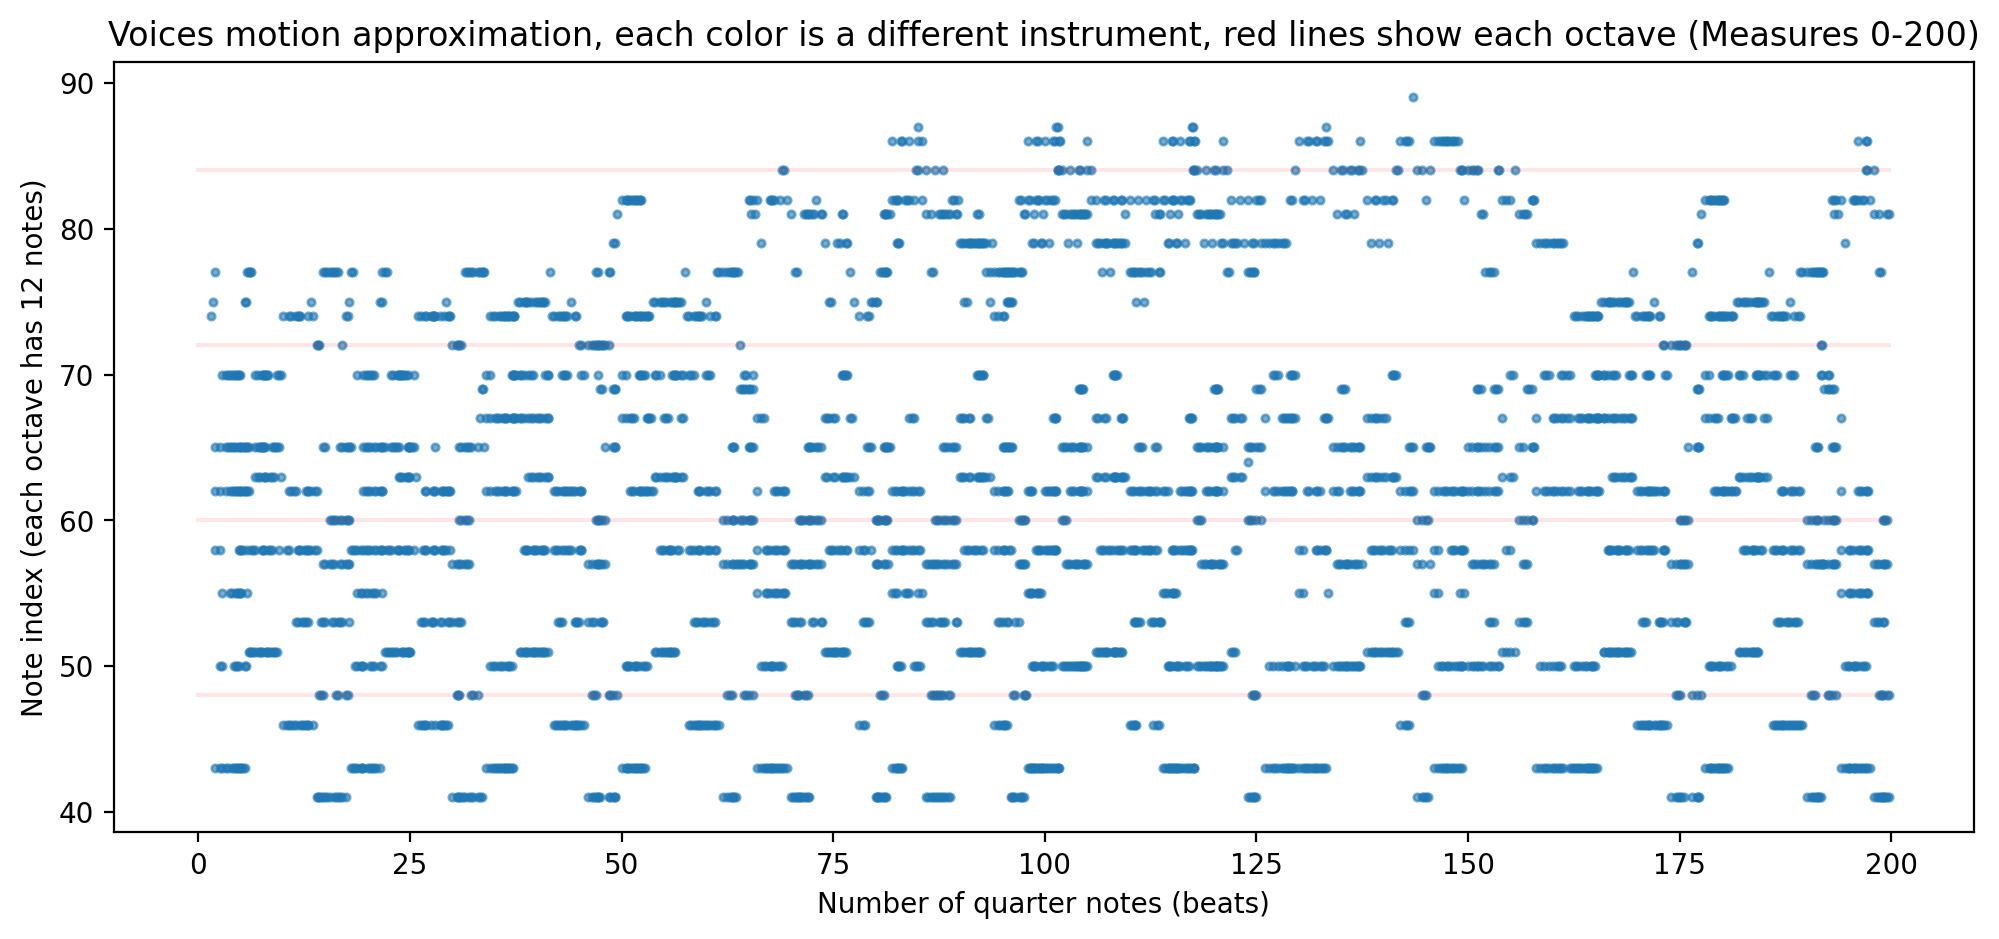

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Piano 'MELODY: Piano'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark andantino Quarter=82.0>
    {0.0} <music21.meter.TimeSignature 2/4>
    {0.0} <music21.note.Rest dotted-quarter>
    {1.5} <music21.chord.Chord D5>
    {1.75} <music21.chord.Chord E-5>


In [18]:
from music21 import stream, converter

# Replace the open_midi function with music21's converter.parse
temp_midi_chords = converter.parse(
    "C:/Users/naomi/Thesis/Thesis/Thesis-main/POP909/003/003.mid"
).chordify()
temp_midi = stream.Score()
temp_midi.insert(0, temp_midi_chords)

# Printing merged tracks.
print_parts_countour(temp_midi, start_measure=0, end_measure=200)

# Dumping first measure notes
temp_midi_chords.measures(0, 1).show("text")


In [20]:
from music21 import roman

def note_count(measure, count_dict):
    bass_note = None
    for chord in measure.recurse().getElementsByClass('Chord'):
        # All notes have the same length of its chord parent.
        note_length = chord.quarterLength
        for note in chord.pitches:          
            # If note is "C5", note.name is "C". We use "C5"
            # style to be able to detect more precise inversions.
            note_name = str(note) 
            if (bass_note is None or bass_note.ps > note.ps):
                bass_note = note
                
            if note_name in count_dict:
                count_dict[note_name] += note_length
            else:
                count_dict[note_name] = note_length
        
    return bass_note
                
def simplify_roman_name(roman_numeral):
    # Chords can get nasty names as "bII#86#6#5",
    # in this method we try to simplify names, even if it ends in
    # a different chord to reduce the chord vocabulary and display
    # chord function clearer.
    ret = roman_numeral.romanNumeral
    inversion_name = None
    inversion = roman_numeral.inversion()
    
    # Checking valid inversions.
    if ((roman_numeral.isTriad() and inversion < 3) or
            (inversion < 4 and
                 (roman_numeral.seventh is not None or roman_numeral.isSeventh()))):
        inversion_name = roman_numeral.inversionName()
        
    if (inversion_name is not None):
        ret = ret + str(inversion_name)
        
    elif (roman_numeral.isDominantSeventh()): ret = ret + "M7"
    elif (roman_numeral.isDiminishedSeventh()): ret = ret + "o7"
    return ret
                
def harmonic_reduction(midi_file):
    ret = []
    temp_midi = stream.Score()
    temp_midi_chords = midi_file.chordify()
    temp_midi.insert(0, temp_midi_chords)    
    music_key = temp_midi.analyze('key')
    max_notes_per_chord = 4   
    for m in temp_midi_chords.measures(0, None): # None = get all measures.
        if (type(m) != stream.Measure):
            continue
        
        # Here we count all notes length in each measure,
        # get the most frequent ones and try to create a chord with them.
        count_dict = dict()
        bass_note = note_count(m, count_dict)
        if (len(count_dict) < 1):
            ret.append("-") # Empty measure
            continue
        
        sorted_items = sorted(count_dict.items(), key=lambda x:x[1])
        sorted_notes = [item[0] for item in sorted_items[-max_notes_per_chord:]]
        measure_chord = chord.Chord(sorted_notes)
        
        # Convert the chord to the functional roman representation
        # to make its information independent of the music key.
        roman_numeral = roman.romanNumeralFromChord(measure_chord, music_key)
        ret.append(simplify_roman_name(roman_numeral))
        
    return ret

harmonic_reduction(midi_data)[0:10]

['iv42', 'vi7', 'vi7', 'iv', 'iv', 'I', 'I53', 'V', 'V53', 'vi53']